7. Seleccione una de las variables y haga un modelo univariado de regresión lineal para
predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la
predicción). Muéstrelo gráficamente.

 Modelo entrenado: SalePrice = 24899.75 + 102.49 * GrLivArea

 Evaluación del Modelo:
🔹 MAE (Error Absoluto Medio): 38341.20
🔹 MSE (Error Cuadrático Medio): 3418946311.18
🔹 RMSE (Raíz del Error Cuadrático Medio): 58471.76
🔹 R² (Coeficiente de Determinación): 0.5543


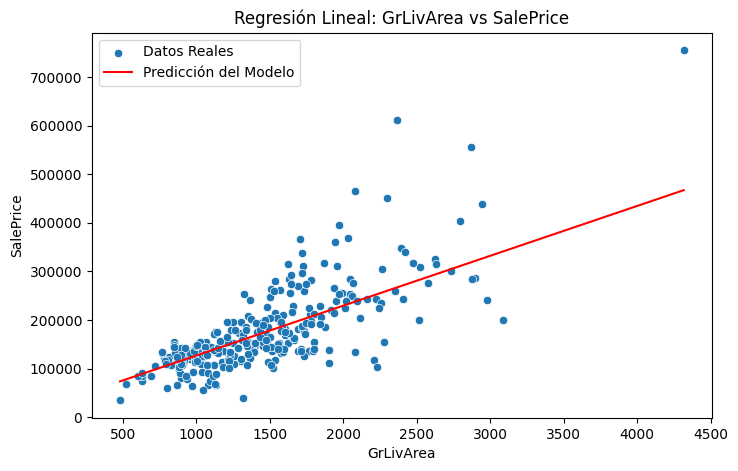

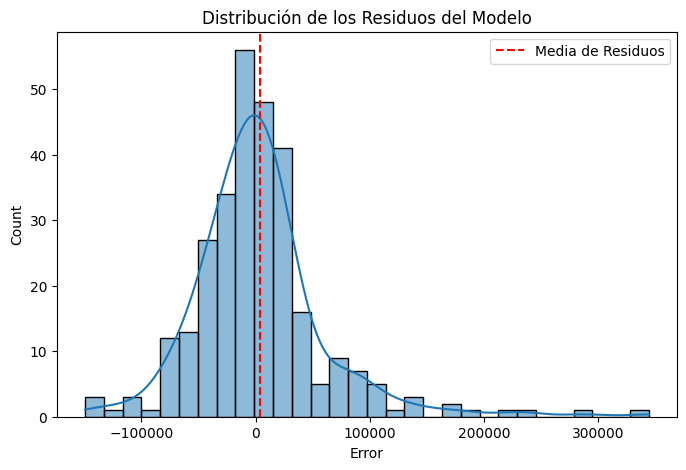

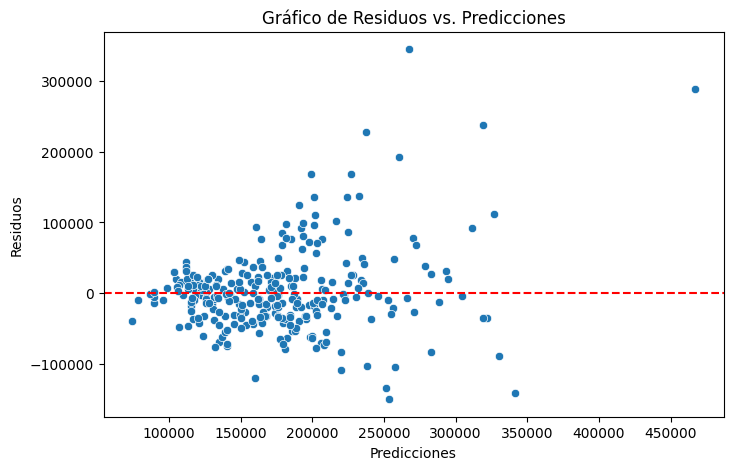

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("dataset/train.csv")

# Seleccionar solo las columnas necesarias
df = df[['GrLivArea', 'SalePrice']].dropna()  # Asegurar que no haya valores nulos

# Separar en variables predictora y objetivo
X = df[['GrLivArea']]  # Variable predictora
y = df['SalePrice']     # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes del modelo
intercept = model.intercept_
slope = model.coef_[0]

print(f" Modelo entrenado: SalePrice = {intercept:.2f} + {slope:.2f} * GrLivArea")

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Evaluación del Modelo:")
print(f"🔹 MAE (Error Absoluto Medio): {mae:.2f}")
print(f"🔹 MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"🔹 RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"🔹 R² (Coeficiente de Determinación): {r2:.4f}")

# Gráfico de dispersión con la regresión lineal
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label="Datos Reales")
sns.lineplot(x=X_test['GrLivArea'], y=y_pred, color='red', label="Predicción del Modelo")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Regresión Lineal: GrLivArea vs SalePrice")
plt.legend()
plt.show()

# Análisis de residuos
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=30, kde=True)
plt.axvline(residuos.mean(), color='red', linestyle='dashed', label="Media de Residuos")
plt.title("Distribución de los Residuos del Modelo")
plt.xlabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Predicciones")
plt.show()


El modelo de regresión lineal simple entrenado con GrLivArea como variable predictora mostró una relación positiva con SalePrice, lo que indica que a medida que aumenta el área habitable sobre el suelo, también lo hace el precio de la vivienda. Sin embargo, con un coeficiente de determinación R² de 0.5543, el modelo explica solo el 55.43% de la variabilidad en SalePrice, lo que sugiere que otros factores también juegan un papel importante en la determinación del precio.

El análisis de residuos mostró que la mayoría de los errores están distribuidos alrededor de cero, pero existe una cola larga hacia valores positivos, lo que indica que el modelo subestima el precio de algunas casas. Además, en el gráfico de residuos contra predicciones, se observa que los errores tienden a aumentar a medida que SalePrice crece, lo que sugiere la presencia de heterocedasticidad, es decir, la variabilidad del error no es constante en todo el rango de predicciones.

En general, aunque el modelo proporciona una primera aproximación razonable, su rendimiento es limitado por la variabilidad no explicada y la posible influencia de valores atípicos. Para mejorar la predicción, se recomienda explorar modelos multivariados que incluyan variables adicionales con alta correlación con SalePrice, como la calidad general de la construcción (OverallQual) y el tamaño del sótano (TotalBsmtSF). 